## Notebook Overview: Initial Data Cleaning and Extraction

This notebook handles the initial data cleaning process by extracting, consolidating, and inspecting CTD cast files archived in multiple daily ZIP folders. Each ZIP archive contains CSV files from individual casts collected on different days.

### Objectives:
- **Extract Archived Files**: Unzip multiple daily datasets and organize them by date into structured directories.
- **Batch Load CSVs**: Identify and load cast CSVs from each extracted folder for inspection and merging.
- **Prepare for Filtering**: Conduct a preliminary review of each cast file to ensure data completeness and compatibility with further filtering and interpolation steps.

This workflow is the foundational step in preparing raw CTD cast data for spatial filtering, temporal alignment, and final visualization or modeling.


In [ ]:
import zipfile, os
import pandas as pd
import matplotlib.pyplot as plt
!pip install rasterio --quiet
import rasterio
from rasterio.plot import show
from shapely.geometry import Point, Polygon

In [ ]:
zip_path = '/content/drive/MyDrive/Misc/Data/5-14/data1.zip'
extract_path = '/content/extracted_5_15'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("📁 Extracted contents:", os.listdir(extract_path))

# Load CSVs
csvs = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
for f in csvs:
    df = pd.read_csv(os.path.join(extract_path, f))
    print(f"\n📄 File: {f} — Shape: {df.shape}")
    print(df.head())

📁 Extracted contents: ['Data']


In [ ]:
zip_path = '/content/drive/MyDrive/Misc/Data/5-15/data2.zip'
extract_path = '/content/extracted_5_16'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("📁 Extracted contents:", os.listdir(extract_path))

csvs = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
for f in csvs:
    df = pd.read_csv(os.path.join(extract_path, f))
    print(f"\n📄 File: {f} — Shape: {df.shape}")
    print(df.head())


📁 Extracted contents: ['Data']


In [ ]:
zip_path = '/content/drive/MyDrive/Misc/Data/5-17/data3.zip'
extract_path = '/content/extracted_5_17'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("📁 Extracted contents:", os.listdir(extract_path))

csvs = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
for f in csvs:
    df = pd.read_csv(os.path.join(extract_path, f))
    print(f"\n📄 File: {f} — Shape: {df.shape}")
    print(df.head())


📁 Extracted contents: ['data']


In [ ]:
import zipfile, os
import pandas as pd

zip_path = '/content/drive/MyDrive/Misc/Data/5-18/data4.zip'  # ← Change path for each set
extract_path = '/content/extracted_5_18'
os.makedirs(extract_path, exist_ok=True)

# Unzip safely
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("📁 Extracted files:", len(os.listdir(extract_path)))

# Try reading each CSV
csvs = [f for f in os.listdir(extract_path) if f.endswith('.csv')]

for f in csvs:
    file_path = os.path.join(extract_path, f)
    try:
        df = pd.read_csv(file_path, on_bad_lines='skip')  # tolerant read
        print(f"\n✅ Loaded: {f} — Shape: {df.shape}")
        print(df.head(3))
    except Exception as e:
        print(f"❌ Failed: {f} — {e}")


📁 Extracted files: 150

✅ Loaded: CC2435009_20250518_191844.csv — Shape: (27, 2)
              % Device                  CC2435009
0          % File name  CC2435009_20250518_191844
1    % Cast time (UTC)        2025-05-18 19:18:44
2  % Cast time (local)        2025-05-18 13:18:44

✅ Loaded: CC2435009_20250513_203433.csv — Shape: (27, 2)
              % Device                  CC2435009
0          % File name  CC2435009_20250513_203433
1    % Cast time (UTC)        2025-05-13 20:34:33
2  % Cast time (local)        2025-05-13 14:34:33

✅ Loaded: CC2435009_20250518_184557.csv — Shape: (27, 2)
              % Device                  CC2435009
0          % File name  CC2435009_20250518_184557
1    % Cast time (UTC)        2025-05-18 18:45:57
2  % Cast time (local)        2025-05-18 12:45:57

✅ Loaded: CC2435009_20250517_170058.csv — Shape: (27, 2)
              % Device                  CC2435009
0          % File name  CC2435009_20250517_170058
1    % Cast time (UTC)        2025-05-17 17:0

In [ ]:
zip_path = '/content/drive/MyDrive/Misc/Data/5-19/data5.zip'
extract_path = '/content/extracted_5_19'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("📁 Extracted contents:", os.listdir(extract_path))

csvs = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
for f in csvs:
    df = pd.read_csv(os.path.join(extract_path, f))
    print(f"\n📄 File: {f} — Shape: {df.shape}")
    print(df.head())

📁 Extracted contents: ['Data']


In [ ]:
# Folder setup
base_paths = {
    '5_15': '/content/extracted_5_15',
    '5_16': '/content/extracted_5_16',
    '5_17': '/content/extracted_5_17',
    '5_18': '/content/extracted_5_18',  # special case (no "Data" folder)
    '5_19': '/content/extracted_5_19'
}

all_dataframes = []

for label, path in base_paths.items():
    # Determine if subfolder 'Data' exists (most cases)
    candidate_path = os.path.join(path, 'Data')
    if os.path.exists(candidate_path):
        csv_folder = candidate_path
    else:
        csv_folder = path  # use root if no subfolder (5_18)

    # Load all CSVs
    csvs = [f for f in os.listdir(csv_folder) if f.endswith('.csv')]
    for csv_file in csvs:
        full_path = os.path.join(csv_folder, csv_file)
        try:
            df = pd.read_csv(full_path, on_bad_lines='skip')
            df['source_file'] = csv_file         # traceability
            df['source_day'] = label             # tag with folder/day
            all_dataframes.append(df)
        except Exception as e:
            print(f"❌ Failed to load {csv_file} in {label}: {e}")

# Combine all
if all_dataframes:
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    print(f"\n✅ Combined shape: {combined_df.shape}")

    # Save to CSV
    combined_df.to_csv('/content/combined_all_days.csv', index=False)
    print("📄 Saved to: /content/combined_all_days.csv")
else:
    print("🚫 No valid CSVs to combine.")



✅ Combined shape: (8262, 4)
📄 Saved to: /content/combined_all_days.csv


In [ ]:
# . . . . . . Extracting all data

base_paths = {
    '5_15': '/content/extracted_5_15',
    '5_16': '/content/extracted_5_16',
    '5_17': '/content/extracted_5_17',
    '5_18': '/content/extracted_5_18',
    '5_19': '/content/extracted_5_19'
}

gps_records = []

for label, base in base_paths.items():
    data_dir = os.path.join(base, 'Data') if os.path.exists(os.path.join(base, 'Data')) else base
    csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

    for f in csv_files:
        try:
            path = os.path.join(data_dir, f)
            df = pd.read_csv(path, header=None, engine='python')

            # Strip spaces and locate values
            lat_row = df[df[0].str.strip() == '% Start latitude']
            lon_row = df[df[0].str.strip() == '% Start longitude']

            if not lat_row.empty and not lon_row.empty:
                lat = float(lat_row.iloc[0, 1])
                lon = float(lon_row.iloc[0, 1])
                gps_records.append({
                    'Latitude': lat,
                    'Longitude': lon,
                    'File': f,
                    'Date': label
                })
            else:
                print(f"⚠️ Missing GPS in {f}")

        except Exception as e:
            print(f"❌ Error reading {f}: {e}")

# Compile into DataFrame
gps_df = pd.DataFrame(gps_records)

# Display and plot
if gps_df.empty:
    print("🚫 No GPS coordinates were found.")
else:
    print(f"✅ Parsed {len(gps_df)} GPS points.")
    display(gps_df.head())

    plt.figure(figsize=(10, 8))
    for date, group in gps_df.groupby("Date"):
        plt.scatter(group['Longitude'], group['Latitude'], label=date, s=50)

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("CTD Cast Locations by Day")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


❌ Error reading CC2435009_20250513_203433.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250514_171550.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250513_203453.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250513_200136.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250514_184901.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250513_195713.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250513_182851.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250514_171224.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250514_195240.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250514_174114.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250514_165357.csv: Expected 2 fields in line 29, saw 8
❌ Error reading CC2435009_20250513_181211.csv: Expected 2 fields in line 29, saw 8
❌ Er

In [ ]:
# Replace this path with one known-good file
file_path = '/content/extracted_5_15/Data/CC2435009_20250513_182530.csv'

# Try reading the first 30 lines raw
with open(file_path, 'r') as f:
    for i in range(30):
        print(f.readline().strip())

% Device,CC2435009
% File name,CC2435009_20250513_182530
% Cast time (UTC),2025-05-13 18:25:30
% Cast time (local),2025-05-13 12:25:30
% Sample type,Cast
% Cast data,Processed
% Location source,GPS
% Default latitude,32
% Default altitude,0
% Start latitude,40.2799046
% Start longitude,-106.851733
% Start altitude,2182.89697265625
% Start GPS horizontal error(Meter),13.116999626159667
% Start GPS vertical error(Meter),24.10300064086914
% Start GPS number of satellites,6
% End latitude,40.2800949
% End longitude,-106.8520601
% End altitude,2079.2219238281248
% End GPS horizontal error(Meter),128.85000610351563
% End GPS vertical error(Meter),433.66900634765624
% End GPS number of satellites,5
% Cast duration (Seconds),36.6
% Samples per second,5
% Electronics calibration date,0001-01-01
% Conductivity calibration date,2024-10-09
% Temperature calibration date,2024-10-07
% Pressure calibration date,2024-09-17
%
Pressure (Decibar),Depth (Meter),Temperature (Celsius),Conductivity (MicroSie

In [ ]:
lat = None
lon = None

with open(file_path, 'r') as f:
    for line in f:
        if '% Start latitude' in line:
            lat = float(line.split(',')[1].strip()) if ',' in line else float(line.split()[1])
        elif '% Start longitude' in line:
            lon = float(line.split(',')[1].strip()) if ',' in line else float(line.split()[1])

print("Latitude:", lat)
print("Longitude:", lon)

Latitude: 40.2799046
Longitude: -106.851733


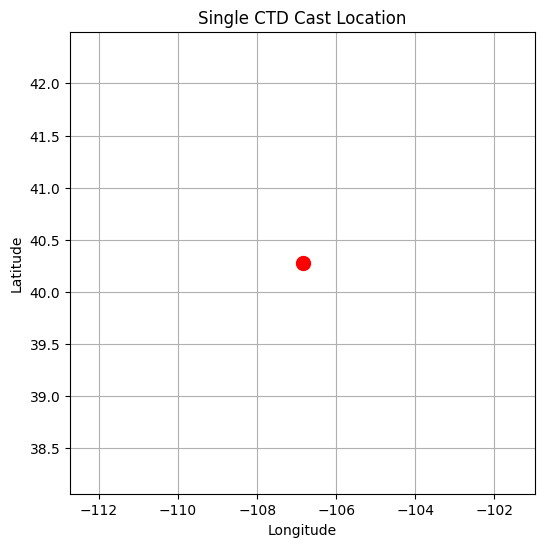

In [ ]:
# . . . . Testing Single Point

if lat and lon:
    plt.figure(figsize=(6,6))
    plt.scatter(lon, lat, c='red', s=100)
    plt.title("Single CTD Cast Location")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.show()
else:
    print("🚫 No valid coordinates found in the file.")

✅ Parsed 306 cast locations.


,Latitude,Longitude,File,Date
0,40.285370,-106.854153,CC2435009_20250513_203433.csv,5_15
1,40.279760,-106.844099,CC2435009_20250514_171550.csv,5_15
2,40.285424,-106.854289,CC2435009_20250513_203453.csv,5_15
3,40.284124,-106.853656,CC2435009_20250513_200136.csv,5_15
4,40.285992,-106.854821,CC2435009_20250514_184901.csv,5_15


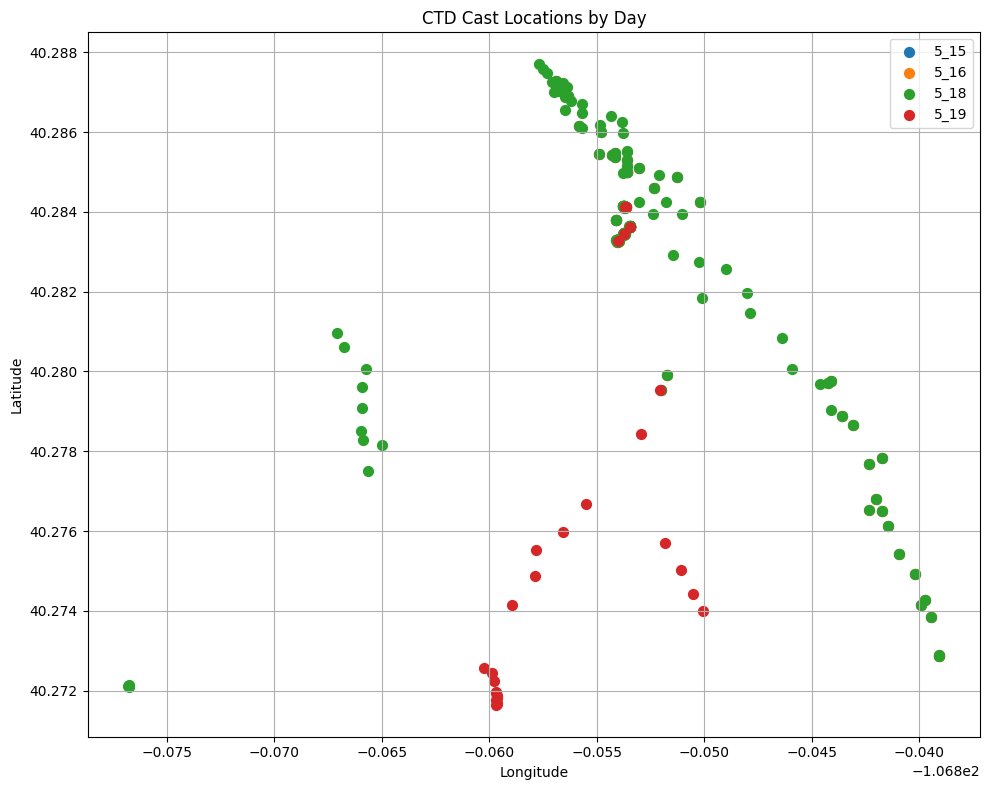

In [ ]:
# . . . . . Plotting all points

base_paths = {
    '5_15': '/content/extracted_5_15',
    '5_16': '/content/extracted_5_16',
    '5_17': '/content/extracted_5_17',
    '5_18': '/content/extracted_5_18',
    '5_19': '/content/extracted_5_19'
}

gps_records = []

for label, base in base_paths.items():
    data_dir = os.path.join(base, 'Data') if os.path.exists(os.path.join(base, 'Data')) else base
    csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

    for f in csv_files:
        file_path = os.path.join(data_dir, f)
        lat = None
        lon = None

        try:
            with open(file_path, 'r') as file:
                for line in file:
                    if '% Start latitude' in line:
                        lat = float(line.split(',')[1].strip()) if ',' in line else float(line.split()[1])
                    elif '% Start longitude' in line:
                        lon = float(line.split(',')[1].strip()) if ',' in line else float(line.split()[1])
                    if lat is not None and lon is not None:
                        gps_records.append({
                            'Latitude': lat,
                            'Longitude': lon,
                            'File': f,
                            'Date': label
                        })
                        break  # Stop scanning lines once GPS is found

        except Exception as e:
            print(f"❌ Error in {f}: {e}")

# Plot if we have any results
if gps_records:
    import pandas as pd
    gps_df = pd.DataFrame(gps_records)

    print(f"✅ Parsed {len(gps_df)} cast locations.")
    display(gps_df.head())

    # Spatial plot
    plt.figure(figsize=(10, 8))
    for date, group in gps_df.groupby("Date"):
        plt.scatter(group['Longitude'], group['Latitude'], label=date, s=50)

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("CTD Cast Locations by Day")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("🚫 No valid GPS coordinates found.")


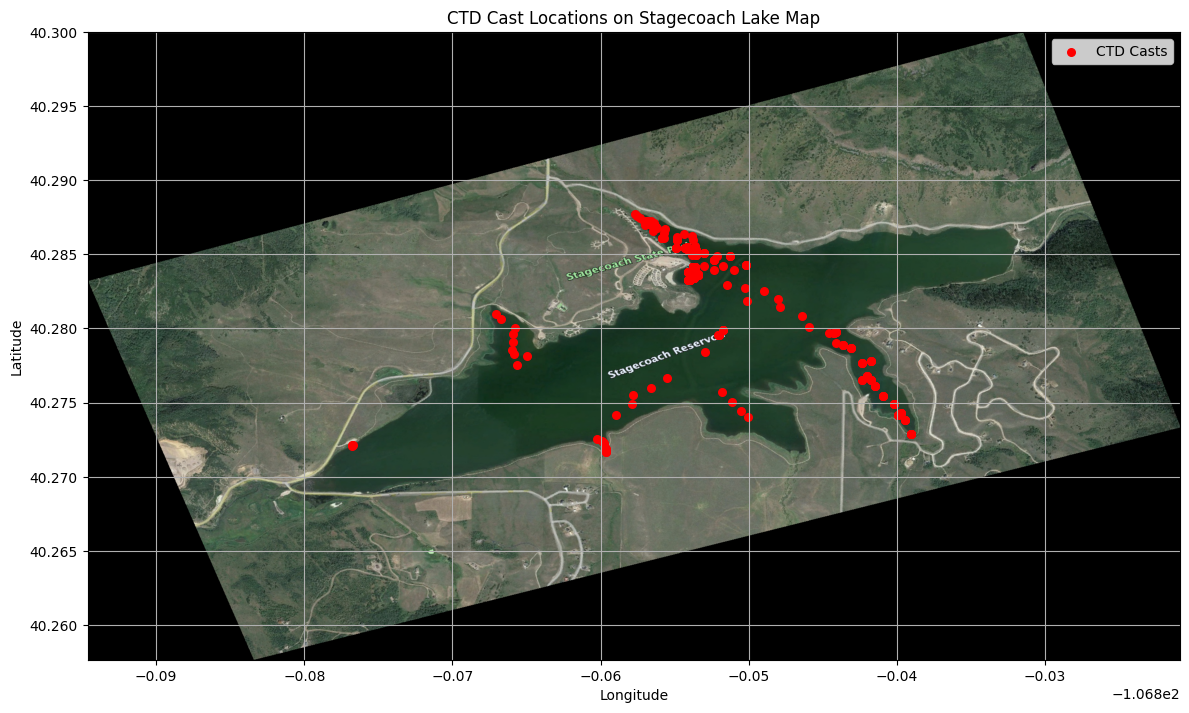

In [ ]:
# . . . . Plotting points across lake on TIFF for identification

# Load the GeoTIFF
tif_path = "/content/drive/MyDrive/Misc/stagecoach.tif"
with rasterio.open(tif_path) as src:
    fig, ax = plt.subplots(figsize=(12, 10))
    show(src, ax=ax)

    # Plot GPS points (in same CRS as image: assumes lat/lon WGS84)
    ax.scatter(gps_df['Longitude'], gps_df['Latitude'], c='red', s=30, label='CTD Casts')

    ax.set_title("CTD Cast Locations on Stagecoach Lake Map")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
# . . . . . First attempt at highlighting only Dock Points (Process completed in 'Dock_Organization' notebook)

# Define dock polygon from your coordinates
dock_coords = [
    (-106.854340, 40.283481),
    (-106.854101, 40.283199),
    (-106.853171, 40.283739),
    (-106.853466, 40.283944)
]
dock_polygon = Polygon(dock_coords)

# Filter points
gps_df['geometry'] = gps_df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
dock_df = gps_df[gps_df['geometry'].apply(dock_polygon.contains)].copy()

print(f"✅ Found {len(dock_df)} CTD casts within dock area.")
dock_df.drop(columns='geometry', inplace=True)  # cleanup
display(dock_df.head())


✅ Found 84 CTD casts within dock area.


,Latitude,Longitude,File,Date
8,40.283298,-106.854094,CC2435009_20250514_195240.csv,5_15
12,40.283283,-106.854040,CC2435009_20250513_195019.csv,5_15
15,40.283628,-106.853450,CC2435009_20250513_194404.csv,5_15
20,40.283442,-106.853767,CC2435009_20250513_195323.csv,5_15
25,40.283458,-106.853738,CC2435009_20250514_195603.csv,5_15


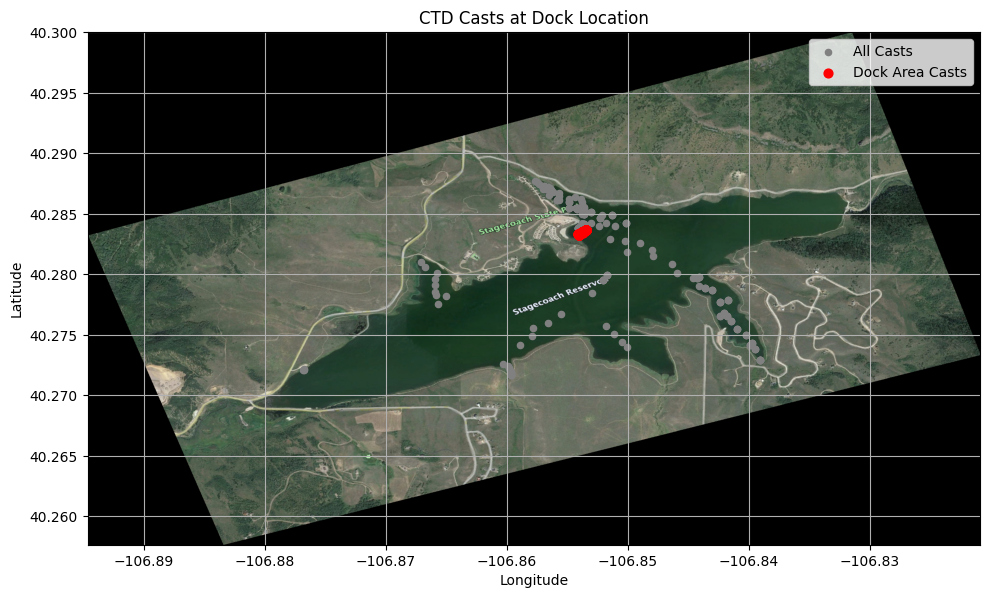

In [ ]:
# . . . . . Plotting

tif_path = "/content/drive/MyDrive/Misc/stagecoach.tif"

with rasterio.open(tif_path) as src:
    fig, ax = plt.subplots(figsize=(10, 10))
    show(src, ax=ax)

    # Plot full points (light gray), dock points (red)
    ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    ax.scatter(gps_df['Longitude'], gps_df['Latitude'], color='gray', s=20, label='All Casts')
    ax.scatter(dock_df['Longitude'], dock_df['Latitude'], color='red', s=40, label='Dock Area Casts')

    ax.set_title("CTD Casts at Dock Location")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.grid(True)
    ax.legend()
    plt.tight_layout()
    plt.show()
